In [1]:
import numpy as np #для получения точек х
import matplotlib.pyplot as plt
 

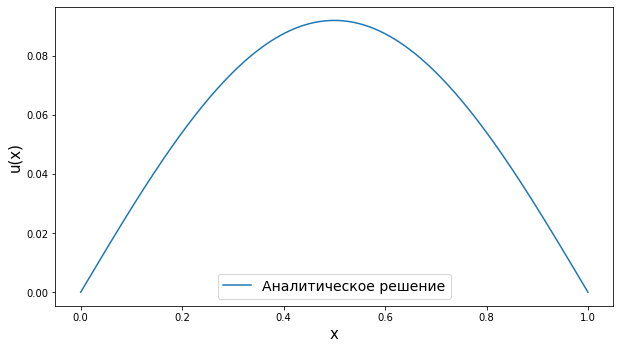

In [2]:
x = np.linspace(0, 1, 201) #беру 201 точку на отрезке, включая концы
u = np.sin(np.pi*x)/(1+np.pi**2) #нахожу значения функции в точках

plt.figure(figsize=(10,5.5)) 
plt.xlabel("x", fontsize=15)
plt.ylabel("u(x)", fontsize=15)
plt.plot(x, u, label = "Аналитическое решение")
plt.legend(loc='best',fontsize=14)
plt.savefig("dz.png")

In [39]:
def solve(N):
    
    ind = np.arange(1, N) # номера узлов 
    f_i = np.sin(ind*np.pi/N) # получение f_i

    A = np.zeros((N-1,N-1))
    h=1/N
    A[0,0] = 2 + h*h
    A[-1,-1] =  2 + h*h
    A[0,1] = -1 
    A[-1,-2] = -1 
# получение матрицы А
    for i in range(1,N-2):
        A[i, i-1] = -1 
        A[i, i+1] = -1 
        A[i, i] =  2 + h*h
        
    L =  np.zeros((N-1,N-1))
    U =  np.zeros((N-1,N-1)) 

    L[0, 0 ] =A[0,0]


    f_i= h*h*f_i

    for i in range(N-1):
        U[i][i] = 1
    
    for i in range(N-2):
        L[i+1][i] = -1

    for i in range(0, N-2):
        U[i][i+1] =A[i,i+1]/L[i][i] 
        L[i+1][i+1] = U[i][i+1] + A[i][i]
    
    y = np.zeros(N-1)
    u_solution = np.zeros(N-1)

    y[0] = f_i[0]/L[0][0]

    for i in range(1, N-1):
        y[i] = (f_i[i] + y[i-1]) / L[i][i]
    
    u_solution[-1] = y[-1]

    for i in range(N-3, -1, -1):
        u_solution[i] = y[i] - U[i][i+1] *u_solution[i+1]
        
    u_solution = np.array([0] + u_solution + [0])
    x_all =np.zeros(N+1)
    x_all[1:-1] = ind/N
    u_all = np.zeros(N+1)
    u_all[1:-1] = u_solution
    x_all[-1] = 1
    x = ind/N
    norm_diff_solution = np.max(np.abs(  np.sin(np.pi*x)/(1+np.pi**2) - u_solution )   )
    #print(norm_diff_solution)
    
    return x_all, u_all, norm_diff_solution

In [40]:
x_coors, u_coors, r = solve(6) 

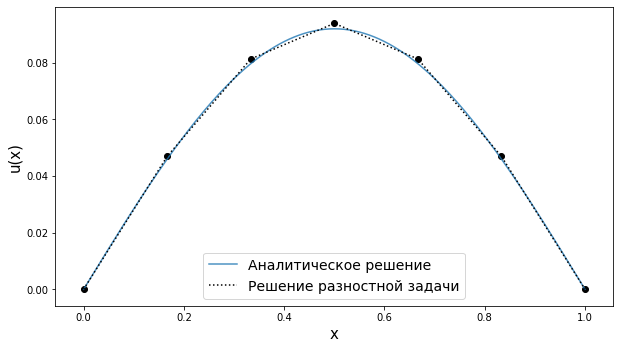

In [41]:

plt.figure(figsize=(10,5.5)) 
plt.xlabel("x", fontsize=15)
plt.ylabel("u(x)", fontsize=15)
plt.plot(x, u, label = "Аналитическое решение", alpha = 0.8)
plt.plot(x_coors, u_coors, ":", c = "k", label = "Решение разностной задачи")
plt.scatter(x_coors, u_coors, c="k")
plt.legend(loc='best',fontsize=14)
plt.savefig("dz1.png")

116
4.32773947732501e-06


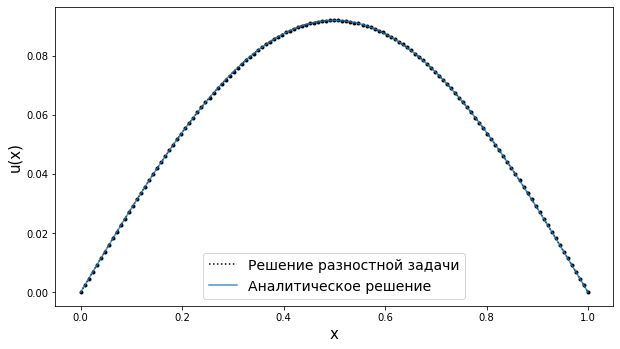

In [50]:
N = 6
x_coors, u_coors, r0 = solve(N) 
N = N +10 
x_coors1, u_coors1, r1 = solve(N) 
while(np.abs(r1-r0)> 1e-6):
    r0 = r1 
    N= N+10 
    x_coors1, u_coors1, r1 = solve(N+10) 
    
print(N)
print(r1)


plt.figure(figsize=(10,5.5)) 
plt.xlabel("x", fontsize=15)
plt.ylabel("u(x)", fontsize=15)

plt.plot(x_coors1, u_coors1, ":", c = "k", label = "Решение разностной задачи")
plt.plot(x_coors1, u_coors1, ".", c="k")
plt.plot(x, u, label = "Аналитическое решение", alpha = 0.8)
plt.legend(loc='best',fontsize=14)
plt.savefig("dz2.png")

116